## Studi Kasus Employee Churn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
import folium
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('employee_churn.csv')

Analisis Employee Churn adalah sebuah studi terhadap tingkat 'churn' dari karyawan perusahaan. Employee (karyawan) dibilang 'Churn' ketika karyawan tersebut pindah kerja ke kantor lain (berhenti bekerja di kantor asal). Secara garis besar, perusahaan-perusahaan ingin bisa 'memprediksi' employee mana yang akan 'churn', supaya bisa melakukan antisipasi agar employee tersebut tidak jadi 'churn'. Mengapa? Karena...lebih besar ongkos yang dikeluarkan untuk mencari & merekrut karyawan baru, melatih mereka dari 0 lagi, ketimbang mempertahankan employee yang sudah ada. Oleh sebab itu, perusahaan-perusahaan ingin mempelajari faktor-faktor apa saja yang dapat dilihat untuk mengantisipasi 'churn' dari seorang employee. 


Setiap baris merepresentasi data dari seorang employee. 

Penjelasan setiap kolom:
- `office_distance_from_house`: jarak (dalam meter) kantor ke rumah karyawan
- `bonus_salary_percentage`: persentase bonus gaji yang diterima karyawan dalam 6 bulan terakhir
- `job_satisfaction`: tingkat kepuasan kerja karyawan
- `education_level`: tingkat pendidikan karyawan
- `overtime_hour`: lama waktu lembur rata-rata (dalam jam)
- `company_latitude`: koordinat garis lintang kantor pusat perusahaan
- `company_longitude`: koordinat garis bujur kantor pusat perusahaan
- `gender`: apabila 0, berarti perempuan, apabila 1, berarti laki-laki
- `churn`: apabila 1, berarti Churn (si karyawan pindah), apabila 0, berarti tidak Churn (karyawan tidak pindah)

### Soal:

1. (30 POIN) Lakukan explorasi dan visualisasi data secara bebas dan tulislah (dalam poin-poin) insights yang Anda peroleh. Berikan minimal 7 poin-poin. 
2. (20 POIN) Lakukanlah data preparation yang diperlukan (misal: mengubah kolom kategorikal menjadi kolom numerikal, dst). Tuliskanlah langkah-langkah yang Anda lakukan dalam tahap ini. 
3. (20 POIN) Tentukan False Positive dan False Negative dari kasus ini. Mana yang lebih 'penting' untuk diperhatikan? Mana yang lebih 'penting' untuk kita hindari? False Positive, atau False Negative? 
4. (30 POIN) Buatlah Machine Learning Model untuk mengklasifikasikan apakah employee akan Churn atau tidak. Kolom 'target' adalah kolom 'Churn'. Evaluasi-lah machine learning model Anda, dan tentukanlah metrik-metrik yang tepat untuk mengukur akurasi dari machine learning model tersebut. 

### Petunjuk:

1. Kerjakanlah pekerjaan kalian di bagian "Tempat Mengerjakan" (di bawah)
2. Jawablah keempat soal di atas di bagian "Jawaban". 

#### Tempat Mengerjakan:

Langkah pertama yang dilakukan adalah melihat dataset secara sekilas menggunakan method head dari pandas.

In [3]:
df.head()

office_distance_from_house  bonus_salary_percentage  job_satisfaction  \
0                      8511.0                    42.51               1.0   
1                     10090.0                    57.48               2.0   
2                     18652.0                    41.22               2.0   
3                     13392.0                    63.57               3.0   
4                     13356.0                    46.16               2.0   

    education_level  overtime_hour  company_latitude  company_longitude  \
0  bachelor/diploma       3.416556         33.309014         -93.330348   
1  bachelor/diploma       2.897149         37.678983         -98.968097   
2  bachelor/diploma       3.180264         37.175891         -77.442812   
3  bachelor/diploma       3.429648         44.408084         -85.703296   
4  bachelor/diploma       3.812226         41.454702         -81.404655   

   gender  churn  
0       0      0  
1       0      0  
2       1      1  
3       0      0  
4       1      1

Ukuran dari dataset dapat dilihat dengan shape

In [4]:
df.shape

(1033, 9)

Method describe digunakan untuk melihat statistik 5 serangkai dari peubah numerik. Dalam hal ini, peubah numerik pada dataset yaitu peubah office_distance_from_house, bonus_salary_percentage, overtime_hour, company_latitude dan company_longitude. Peubah job_satisfaction, gender dan churn hanya ditampilkan tetapi tidak dibaca ataupun digunakan karena merupakan peubah kategorik.

Berdasarkan method describe, terlihat bahwa kelima peubah numerik menyebar normal. Hal ini ditandai dengan nilai median dan mean yang tidak terlalu berbeda pada seluruh peubah numerik.

In [5]:
df.describe()

office_distance_from_house  bonus_salary_percentage  job_satisfaction  \
count                 1033.000000              1033.000000       1033.000000   
mean                 10771.866409                52.125208          2.482091   
std                   3810.278239                13.624713          0.877098   
min                    583.000000                 5.000000          0.000000   
25%                   8202.000000                42.600000          2.000000   
50%                  10530.000000                50.980000          3.000000   
75%                  13185.000000                61.730000          3.000000   
max                  24786.000000                95.700000          5.000000   

       overtime_hour  company_latitude  company_longitude       gender  \
count    1033.000000       1033.000000        1033.000000  1033.000000   
mean        3.080121         41.653243         -87.962635     0.499516   
std         0.627240          3.705374           8.250586     0.500242   
min         1.000000         30.000000        -119.646200     0.000000   
25%         2.628310         38.942425         -93.153696     0.000000   
50%         3.062020         41.557148         -86.857604     0.000000   
75%         3.483906         44.144209         -81.745459     1.000000   
max         5.000000         55.140000         -66.385462     1.000000   

             churn  
count  1033.000000  
mean      0.299129  
std       0.458098  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

Untuk peubah education_level, peubah memiliki tipe data string. Peubah ini diubah representasinya menjadi peubah kategorik dengan tipe data int. 

Nilai high school pada peubah education_level direpresentasikan dengan angka 0, higher education dengan angka 1, bachelor/diploma dengan angka 2 dan masters degree dengan angka 3. Pengubahan tidak dilakukan dengan one hot encoding karena peubah education_level merupakan peubah kategorik bersifat ordinal.

In [6]:
df['education_level'].value_counts()

bachelor/diploma    551
masters degree      463
higher education     11
high-school           8
Name: education_level, dtype: int64

In [7]:
for i in df.index:
    if df['education_level'][i] == 'masters degree':
        df['education_level'][i] = 3
    elif df['education_level'][i] == 'bachelor/diploma':
        df['education_level'][i] = 2
    elif df['education_level'][i] == 'higher education':
        df['education_level'][i] = 1
    else:
        df['education_level'][i] = 0
        

Berikut adalah tampilan dari dataset dengan peubah education_level direpresentasikan dengan tipe peubah int.

In [8]:
df.head()

office_distance_from_house  bonus_salary_percentage  job_satisfaction  \
0                      8511.0                    42.51               1.0   
1                     10090.0                    57.48               2.0   
2                     18652.0                    41.22               2.0   
3                     13392.0                    63.57               3.0   
4                     13356.0                    46.16               2.0   

  education_level  overtime_hour  company_latitude  company_longitude  gender  \
0               2       3.416556         33.309014         -93.330348       0   
1               2       2.897149         37.678983         -98.968097       0   
2               2       3.180264         37.175891         -77.442812       1   
3               2       3.429648         44.408084         -85.703296       0   
4               2       3.812226         41.454702         -81.404655       1   

   churn  
0      0  
1      0  
2      1  
3      0  
4      1

# Exploratory Data Analysis

## Pairplot

Berikut merupakan pairplot dari setiap peubah pada dataset.

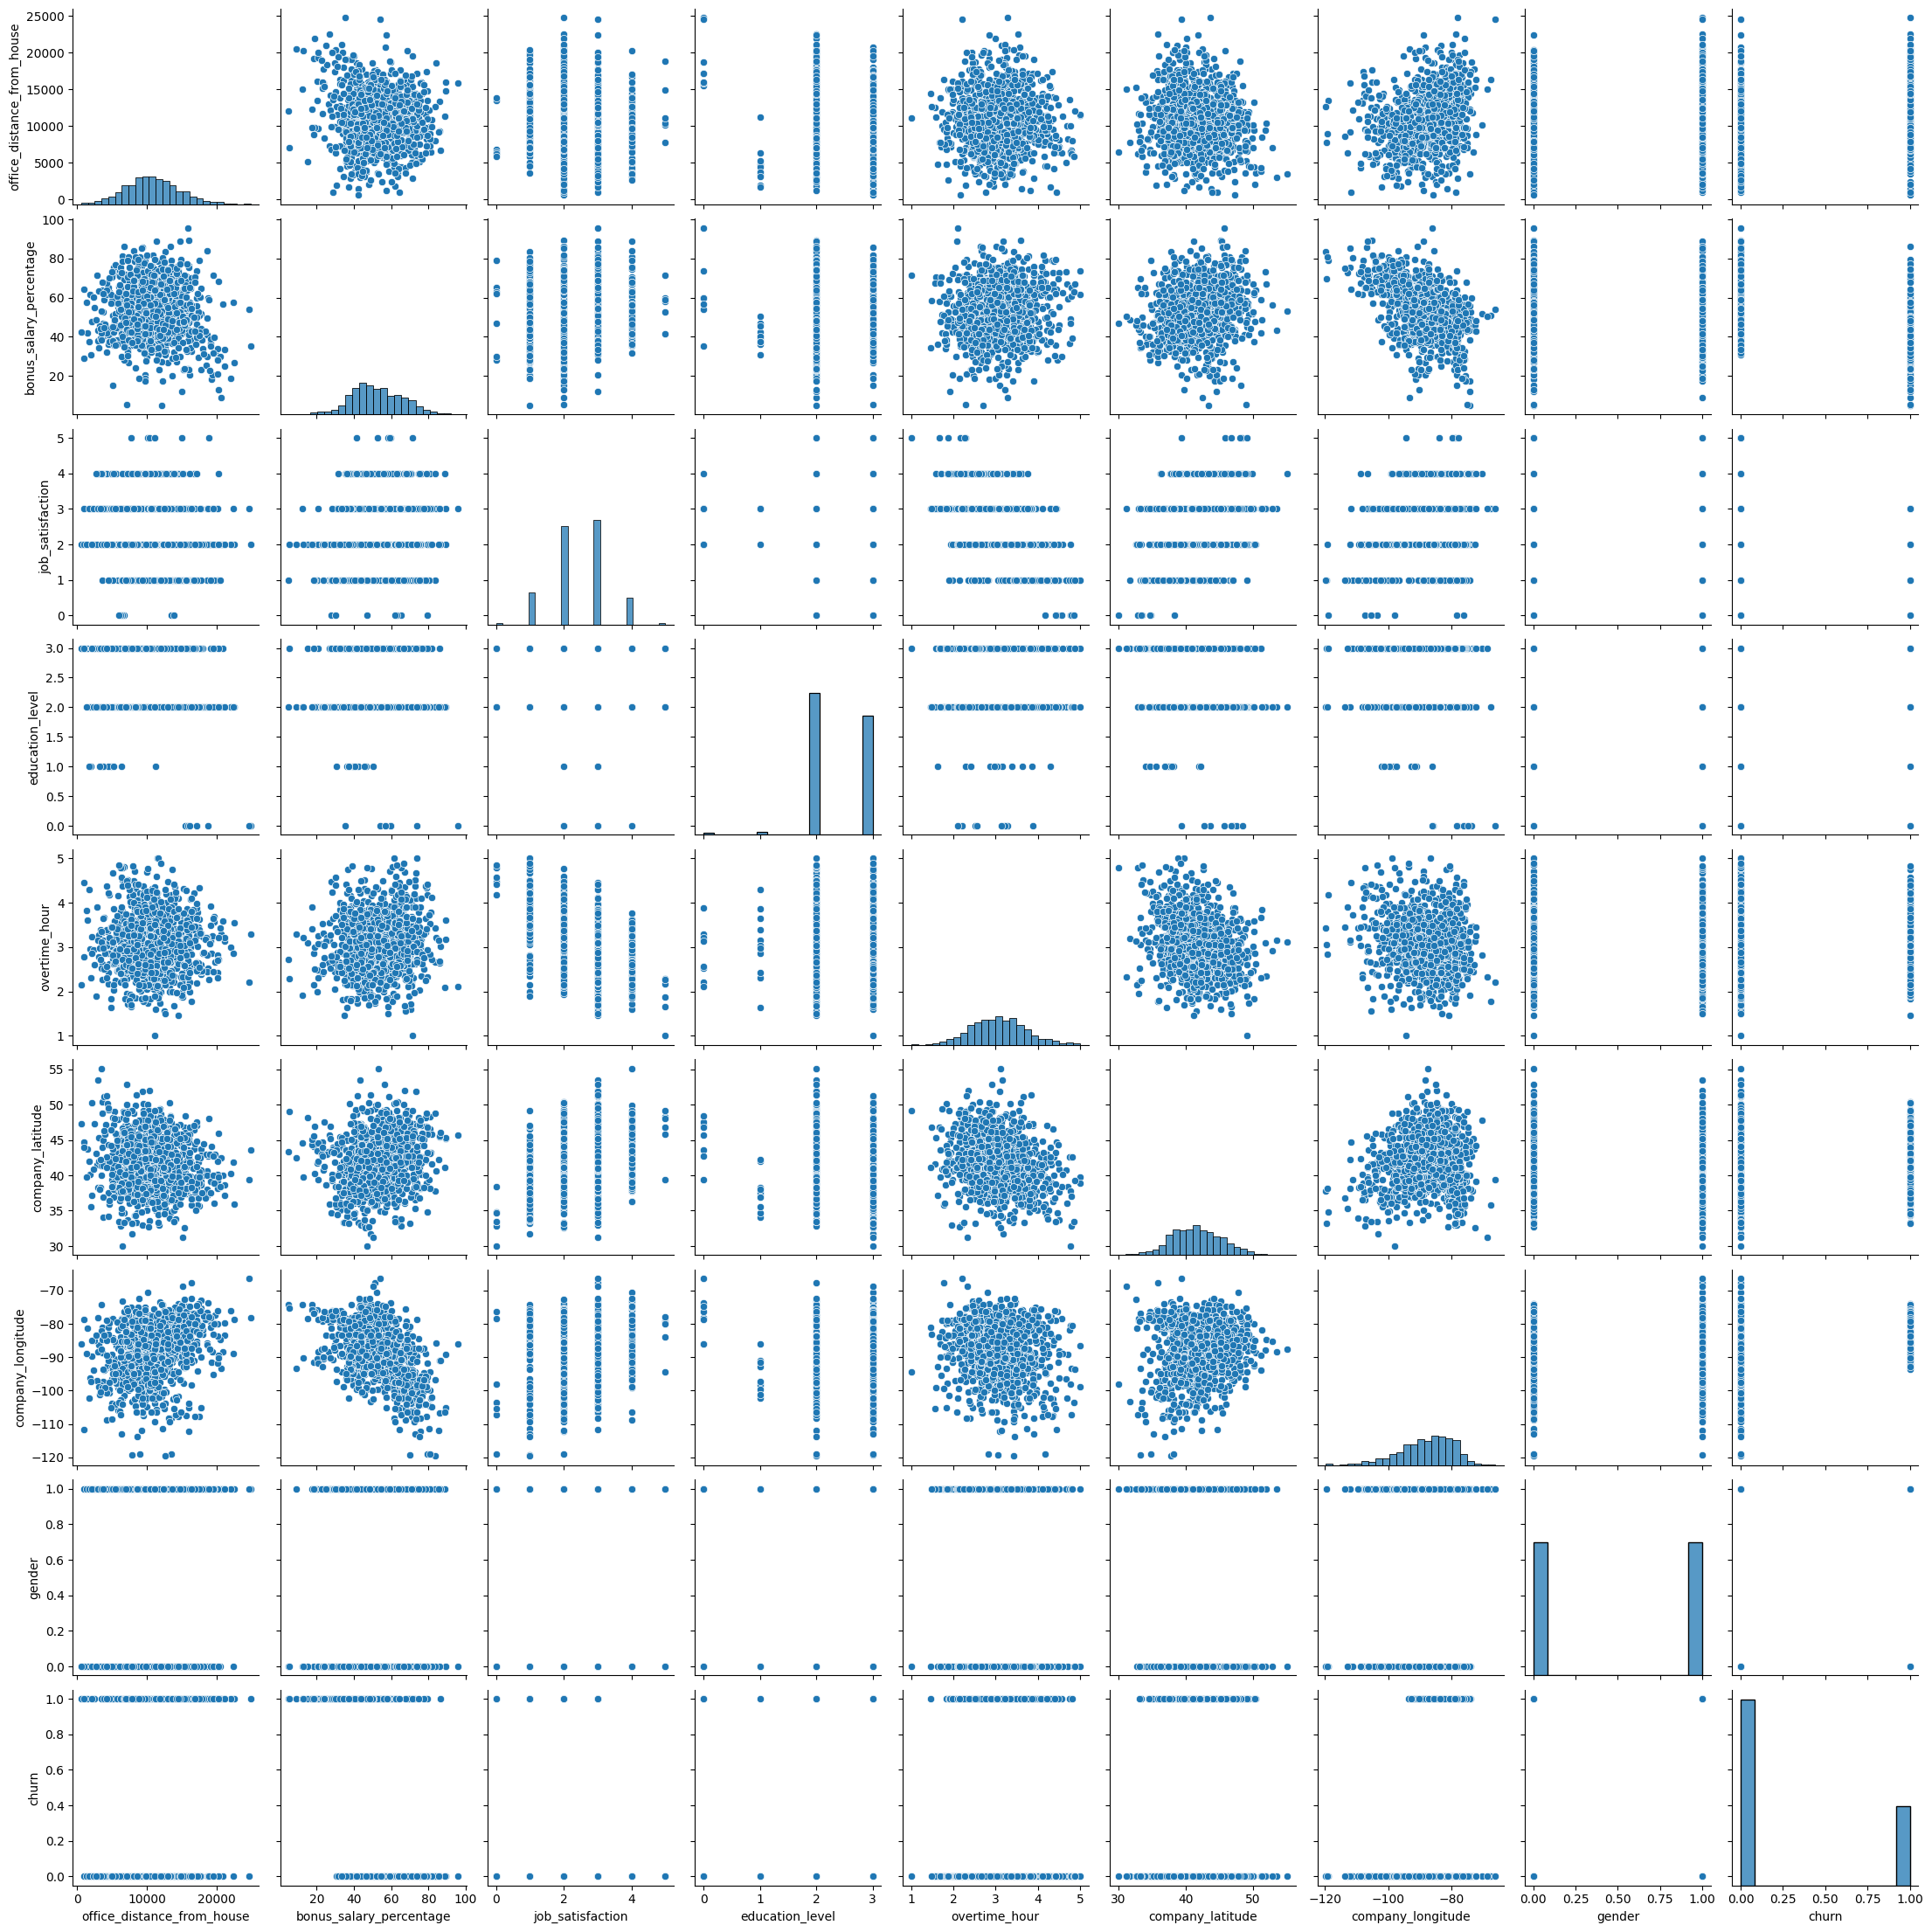

In [9]:
sns.pairplot(df)

Secara visual, berdasarkan pairplot diatas terlihat bahwa terdapat hubungan antar peubah kategorik dan peubah kategorik dengan peubah numerik sebagai berikut:

- Apabila job_satisfaction > 3, maka churn bernilai 0.
- Apabila bonus_salary_percentage berada kurang lebih dibawah 30, maka churn bernilai 1.
- bonus_salary_percentage tertinggi didapatkan oleh karyawan dengan tingkat pendidikan SMA.
- bonus_salary_percentage tertinggi dan terendah didapatkan oleh wanita.
- Semakin tinggi job_satisfaction, semakin rendah rata rata overtime_hour.
- Tidak ada churn bernilai 1 pada company_longitude dibawah -100.

Untuk visualisasi antar peubah numerik, dibuat plot dengan garis regresi untuk menghindari bias asumsi karena visualisasi.

## company_longitude dan bonus_salary_percentage

Pada peubah company_longitude dan bonus_salary_percentage, terdapat hubungan bahwa semakin besar company_longitude maka rata rata bonus_salary_percentage akan semakin menurun.

<AxesSubplot:xlabel='company_longitude', ylabel='bonus_salary_percentage'>

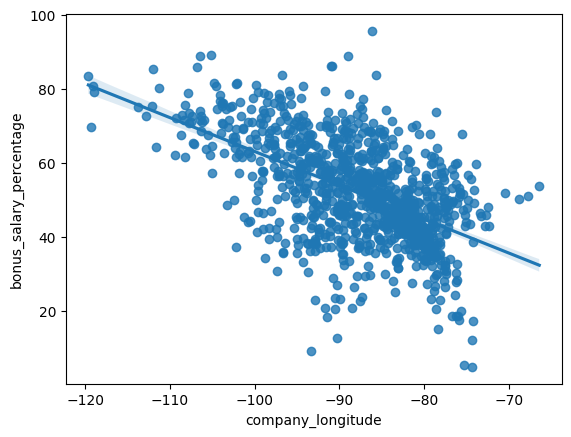

In [10]:
sns.regplot(x = "company_longitude", y = "bonus_salary_percentage", data = df)

## company_latitude dan bonus_salary_percentage

Pada peubah company_latitude dan bonus_salary_percentage, terdapat hubungan bahwa semakin besar company_latitude maka rata rata bonus_salary_percentage akan semakin meningkat.

<AxesSubplot:xlabel='company_latitude', ylabel='bonus_salary_percentage'>

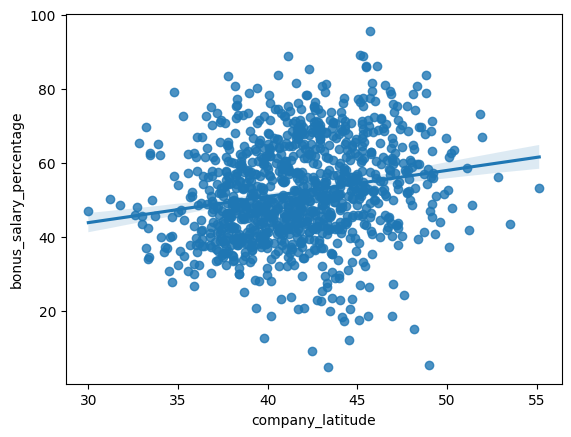

In [11]:
sns.regplot(x = "company_latitude", y = "bonus_salary_percentage", data = df)

## company_longitude dan office_distance_from_house

Pada peubah company_longitude dan office_distance_from_house, terdapat hubungan bahwa semakin besar company_longitude maka rata rata office_distance_from_house akan semakin meningkat.

<AxesSubplot:xlabel='company_longitude', ylabel='office_distance_from_house'>

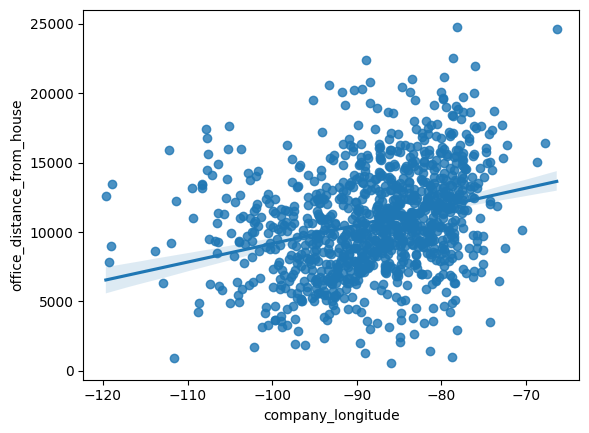

In [12]:
sns.regplot(x = "company_longitude", y = "office_distance_from_house", data = df)

## company_latitude dan overtime_hour

Pada peubah company_latitude dan overtime_hour, terdapat hubungan bahwa semakin besar company_latitude maka rata rata overtime_hour akan semakin menurun.

<AxesSubplot:xlabel='company_latitude', ylabel='overtime_hour'>

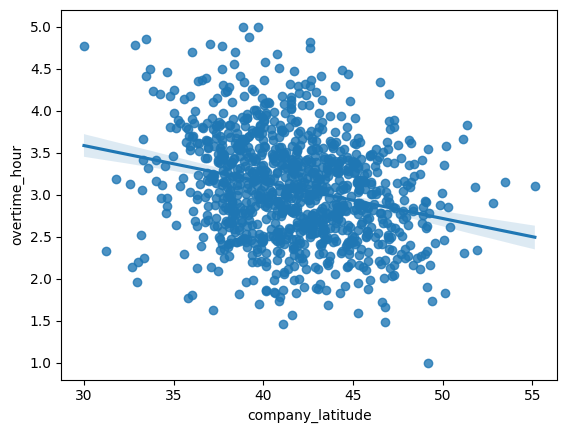

In [13]:
sns.regplot(x = "company_latitude", y = "overtime_hour", data = df)

## Mengubah Longitude dan Latitude menjadi Lokasi Sebenarnya

Longitude dan latitude merupakan garis khayal yang membentuk titik koordinat sebuah lokasi tempat perusahaan berada di bumi. Dengan menggunakan library geopy, didapatkan alamat lokasi dari setiap titik company_longitude dan company_latitude sebagai berikut.

In [14]:
from geopy.geocoders import Nominatim

# geolocator = Nominatim(user_agent="geoapiExercises")
geolocator = Nominatim(user_agent="Rizal")

latlon = []
for i in tqdm(df.index):
    latlons = (df['company_latitude'][i], df['company_longitude'][i])
    latlon.append(latlons)

location = []
for coord in tqdm(latlon):
    location.append(geolocator.reverse(str(coord[0])+","+str(coord[1])))

 78%|█████████████████████████████████████████████████████████████▊                 | 809/1033 [07:31<02:05,  1.79it/s]


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=44.740935054052365&lon=-84.01152976433886&format=json&addressdetails=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000002837F81DB40>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)'))

Hasil diatas menunjukkan alamat lengkap dari sebuah lokasi. Secara sekilas, terlihat bahwa lokasi tersebut seluruhnya berada di Amerika Serikat. 

Peubah baru dapat ditambahkan ke dalam dataset yaitu peubah state (negara bagian) tempat perusahaan tersebut berada.

In [ ]:
address = []

for loc in tqdm(location):
    try:
        address.append(loc.raw['address']['state'])
    except:
        address.append('NA')

In [ ]:
df['state'] = address

In [ ]:
df['state'].unique()

## Visualisasi Lokasi Perusahaan pada Peta

Berikut adalah visualisasi setiap lokasi perusahaan pada peta. Visualisasi ini dihasilkan dengan menggunakan library folium. Warna tag hijau menandakan churn bernilai 0, sementara tag merah menandakan churn bernilai 1.

In [ ]:
latlon = []
for i in df.index:
    latlons = (df['company_latitude'][i], df['company_longitude'][i], df['churn'][i])
    latlon.append(latlons)
mapit = folium.Map( location=[37.0902, -95.7129], zoom_start=3 )
for coord in latlon:
    if coord[2] == 1:
        folium.Marker( location=[ coord[0], coord[1] ], fill_color='#ff0000', radius=1, icon=folium.Icon(color="red")).add_to( mapit )
    else:
        folium.Marker( location=[ coord[0], coord[1] ], fill_color='#00ff00', radius=1, icon=folium.Icon(color="green")).add_to( mapit )

mapit.save( 'map.html')
mapit

Berdasarkan visualisasi peta, didapatkan informasi sebagai berikut :

- Semakin ke barat, maka peluang churn rate bernilai 0 semakin besar.

Proses mendapatkan alamat dengan geopy membutuhkan waktu, sehingga dataset dengan tambahan peubah state disimpan terlebih dahulu agar proses mendapatkan alamat dengan geopy tidak perlu lagi dilakukan.

In [ ]:
df.to_csv('data_with_state.csv', index = False)

# Data Preprocessing

Berikut adalah dataset baru dengan peubah state.

In [15]:
df_state = pd.read_csv('data_with_state.csv')
df_state.head()

office_distance_from_house  bonus_salary_percentage  job_satisfaction  \
0                      8511.0                    42.51               1.0   
1                     10090.0                    57.48               2.0   
2                     18652.0                    41.22               2.0   
3                     13392.0                    63.57               3.0   
4                     13356.0                    46.16               2.0   

   education_level  overtime_hour  company_latitude  company_longitude  \
0                2       3.416556         33.309014         -93.330348   
1                2       2.897149         37.678983         -98.968097   
2                2       3.180264         37.175891         -77.442812   
3                2       3.429648         44.408084         -85.703296   
4                2       3.812226         41.454702         -81.404655   

   gender  churn     state  
0       0      0  Arkansas  
1       0      0    Kansas  
2       1      1  Virginia  
3       0      0  Michigan  
4       1      1      Ohio

Dengan adanya informasi berupa state, kita tidak lagi memerlukan peubah company_longitude dan company_latitude. Kedua peubah tersebut dapat disingkirkan dari dataset.

In [16]:
df_state.drop(['company_latitude', 'company_longitude'], axis = 1, inplace = True)

Peubah state yang berupa peubah kategorik dengan tipe data string dan memiliki banyak unique value dilakukan one hot encoding. Proses one hot encoding dapat dilakukan dengan method get_dummies dari pandas.

In [17]:
state = pd.get_dummies(df_state['state'])

Berikut adalah hasil one hot encoding peubah state.

In [18]:
state

Alabama  Arizona  Arkansas  California  Colorado  Delaware  Idaho  \
0           0        0         1           0         0         0      0   
1           0        0         0           0         0         0      0   
2           0        0         0           0         0         0      0   
3           0        0         0           0         0         0      0   
4           0        0         0           0         0         0      0   
...       ...      ...       ...         ...       ...       ...    ...   
1028        0        0         0           0         0         0      0   
1029        0        0         0           0         0         0      0   
1030        0        0         0           0         0         0      0   
1031        0        0         0           0         0         0      0   
1032        0        0         0           0         0         0      0   

      Illinois  Indiana  Iowa  ...  South Carolina  South Dakota  Tennessee  \
0            0        0     0  ...               0             0          0   
1            0        0     0  ...               0             0          0   
2            0        0     0  ...               0             0          0   
3            0        0     0  ...               0             0          0   
4            0        0     0  ...               0             0          0   
...        ...      ...   ...  ...             ...           ...        ...   
1028         0        0     0  ...               0             0          0   
1029         0        0     0  ...               1             0          0   
1030         0        0     0  ...               0             0          0   
1031         0        0     0  ...               0             0          0   
1032         0        1     0  ...               0             0          0   

      Texas  Utah  Vermont  Virginia  West Virginia  Wisconsin  Wyoming  
0         0     0        0         0              0          0        0  
1         0     0        0         0              0          0        0  
2         0     0        0         1              0          0        0  
3         0     0        0         0              0          0        0  
4         0     0        0         0              0          0        0  
...     ...   ...      ...       ...            ...        ...      ...  
1028      0     0        0         0              0          1        0  
1029      0     0        0         0              0          0        0  
1030      0     0        0         0              0          0        0  
1031      0     0        0         0              0          0        0  
1032      0     0        0         0              0          0        0  

[1033 rows x 39 columns]

Dalam melakukan one hot encoding, perlu dilakukan pembuangan salah satu nilai unique dari peubah yang dilakukan one hot encoding. Hal ini dilakukan untuk mengurangi multikoliniearitas.

In [19]:
state.drop(['Wyoming'], axis = 1, inplace = True)

Gabungkan hasil one hot encoding ke dalam dataset dan singkirkan peubah state.

In [20]:
df_state = pd.concat([df_state, state], axis = 1)

In [21]:
df_state.drop(['state'], axis = 1, inplace = True)

Setiap peubah yang terdiri atas dua kata, spasi diganti dengan tanda underscore(_).

In [22]:
df_state.columns = [i.replace(' ','_') for i in df_state.columns.tolist()]
df_state.columns

Index(['office_distance_from_house', 'bonus_salary_percentage',
       'job_satisfaction', 'education_level', 'overtime_hour', 'gender',
       'churn', 'Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Delaware', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Maryland', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'New_Jersey', 'New_Mexico',
       'New_York', 'North_Carolina', 'North_Dakota', 'Ohio', 'Oklahoma',
       'Ontario', 'Pennsylvania', 'Québec', 'South_Carolina', 'South_Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'West_Virginia',
       'Wisconsin'],
      dtype='object')

# Modelling

Sebelum tahapan modelling dilakukan, dataset dipisahkan menjadi data latih dan data uji dengan proporsi untuk data uji adalah 33% dari data latih.

In [25]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_state, test_size=0.33,random_state=42)

Peubah respon dipisahkan dari dataset sebelum dilakukan modelling.

In [26]:
y_train = train['churn']
y_test = test['churn']

In [27]:
train.drop(['churn'], axis = 1, inplace = True)
test.drop(['churn'], axis = 1, inplace = True)

Model yang digunakan adalah model random forest dengan cross validation sebanyak 10 kali.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

rf = RandomForestClassifier(random_state=42)
rf.fit(train, y_train)
y_pred = cross_val_predict(rf, test, y_test, cv=10)

Dengan model random forest yang digunakan, didapatkan akurasi dan confusion matrix sebagai berikut.

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.9472140762463344

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

confusion_matrix(y_pred, y_test)

array([[239,  10],
       [  8,  84]], dtype=int64)

Berikut adalah hasil dari metrik precision, recall dan F1 Score.

In [31]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       249
           1       0.89      0.91      0.90        92

    accuracy                           0.95       341
   macro avg       0.93      0.94      0.93       341
weighted avg       0.95      0.95      0.95       341



# Feature Importance

Dengan menggunakan model random forest, didapatkan nilai importance dari setiap fitur sebagai berikut.

Feature: office_distance_from_house, Score: 0.11367606506958876
Feature: bonus_salary_percentage, Score: 0.23271598676786925
Feature: job_satisfaction, Score: 0.27243346902004584
Feature: education_level, Score: 0.024982639533178058
Feature: overtime_hour, Score: 0.1036404059126993
Feature: gender, Score: 0.01217271670986206
Feature: Alabama, Score: 2.9424818204239016e-05
Feature: Arizona, Score: 0.00023865269900087734
Feature: Arkansas, Score: 0.00229283178271038
Feature: California, Score: 0.00041219380850394683
Feature: Colorado, Score: 0.006555163088610104
Feature: Delaware, Score: 0.00030888541113986294
Feature: Idaho, Score: 0.00029134245863946304
Feature: Illinois, Score: 0.007822971084977787
Feature: Indiana, Score: 0.0032251931348414265
Feature: Iowa, Score: 0.00505938254873696
Feature: Kansas, Score: 0.006199723607221645
Feature: Kentucky, Score: 0.0033252524865831725
Feature: Maryland, Score: 0.002528421875550657
Feature: Michigan, Score: 0.041845406783560676
Feature: Minnes

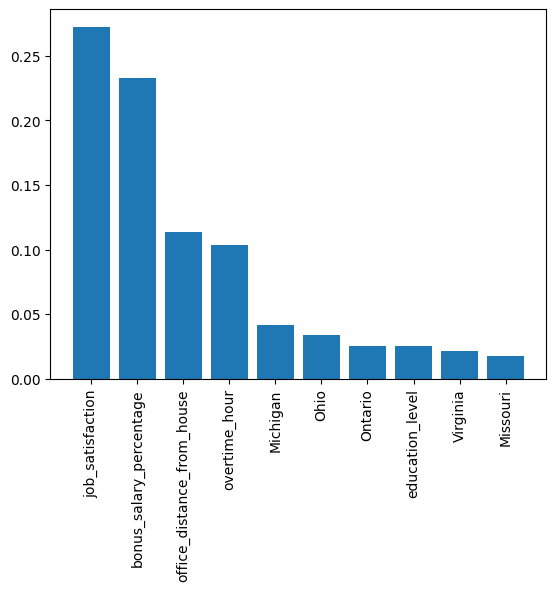

In [23]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
# define dataset
X = df_state.drop('churn',axis=1)
y = df_state['churn']
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
data_imp = pd.DataFrame({'feature':X.columns.tolist(),'importance':importance})

# summarize feature importance
for i,v in zip(X.columns.tolist(),importance):
    print('Feature: {}, Score: {}'.format(i,v))

# plot feature importance
data_imp_samp = data_imp.sort_values('importance',ascending=False).head(10)
plt.bar(data_imp_samp['feature'], data_imp_samp['importance'])
plt.xticks(rotation=90)
plt.show()

Pada grafik diatas, didapatkan 10 fitur terbaik dari model yang digunakan. Berdasarkan grafik, fitur terbaik yang paling berperan dalam model yang dibuat adalah job_satisfaction. DIbawah adalah nilai importance setiap fitur dalam bentuk dataframe, diurutkan dari fitur yang memiliki nilai importance tertinggi hingga importance terendah.

In [24]:
data_imp = data_imp.sort_values('importance', ascending=False)
data_imp.index = [i for i in range(len(data_imp))]
data_imp

feature  importance
0             job_satisfaction    0.272433
1      bonus_salary_percentage    0.232716
2   office_distance_from_house    0.113676
3                overtime_hour    0.103640
4                     Michigan    0.041845
5                         Ohio    0.033908
6                      Ontario    0.025236
7              education_level    0.024983
8                     Virginia    0.021167
9                     Missouri    0.017339
10               West_Virginia    0.014034
11                      gender    0.012173
12                    Illinois    0.007823
13              North_Carolina    0.007558
14                    Nebraska    0.006895
15                    Colorado    0.006555
16                   Wisconsin    0.006250
17                      Kansas    0.006200
18                Pennsylvania    0.006190
19                        Iowa    0.005059
20                    Oklahoma    0.003962
21                    Kentucky    0.003325
22                       Texas    0.003285
23                     Indiana    0.003225
24                    Maryland    0.002528
25                    New_York    0.002450
26                      Québec    0.002415
27                   Minnesota    0.002402
28                    Arkansas    0.002293
29              South_Carolina    0.001925
30                   Tennessee    0.001306
31                  New_Mexico    0.001198
32                 Mississippi    0.000611
33                South_Dakota    0.000603
34                        Utah    0.000547
35                     Montana    0.000481
36                  California    0.000412
37                     Vermont    0.000325
38                    Delaware    0.000309
39                       Idaho    0.000291
40                     Arizona    0.000239
41                North_Dakota    0.000145
42                     Alabama    0.000029
43                  New_Jersey    0.000013

### Feature Selection with Feature importance

100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [02:16<00:00,  3.10s/it]


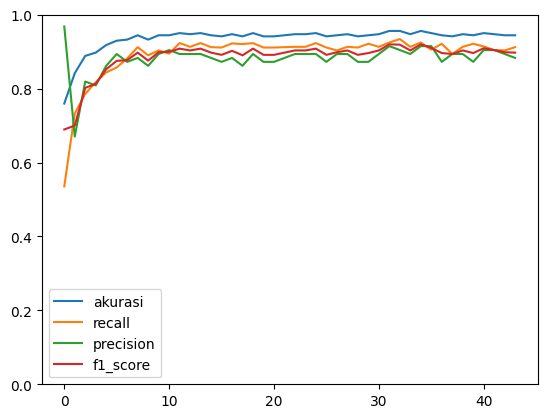

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

akurasi_fitur = []
recall_fitur = []
precision_fitur = []
f1_fitur = []
for i in tqdm(range(len(data_imp))):
    
    data_selec = data_imp.loc[0:i,'feature'].tolist()
    data_selec.append('churn')

    train, test = train_test_split(df_state[data_selec], test_size=0.33,random_state=42)
    y_train = train['churn']
    y_test = test['churn']
    train.drop(['churn'], axis = 1, inplace = True)
    test.drop(['churn'], axis = 1, inplace = True)


    rf = RandomForestClassifier(random_state=42)
    rf.fit(train, y_train)
    y_pred = cross_val_predict(rf, test, y_test, cv=10)
    

    akurasi_fitur.append(accuracy_score(y_pred, y_test))
    recall_fitur.append(recall_score(y_pred, y_test))
    precision_fitur.append(precision_score(y_pred, y_test))
    f1_fitur.append(f1_score(y_pred, y_test))
    # print(confusion_matrix(y_pred, y_test))
    # print(classification_report(y_pred, y_test))
plt.plot(akurasi_fitur,label="akurasi")
plt.plot(recall_fitur,label="recall")
plt.plot(precision_fitur,label="precision")
plt.plot(f1_fitur,label="f1_score")
plt.plot()
plt.legend()
plt.ylim([0,1])
plt.show()

In [33]:
print("Akurasi   :",akurasi_fitur.index(max(akurasi_fitur)))
print("Recall    :",recall_fitur.index(max(recall_fitur)))
print("Precision :",precision_fitur.index(max(precision_fitur)))
print("f1-Score  :",f1_fitur.index(max(f1_fitur)))

Akurasi   : 31
Recall    : 32
Precision : 0
f1-Score  : 31


In [37]:
data_selec = data_imp.loc[0:recall_fitur.index(max(recall_fitur)),'feature'].tolist()
print('Recall :',max(recall_fitur),'Fitur : ',data_selec)

data_selec = data_imp.loc[0:akurasi_fitur.index(max(akurasi_fitur)),'feature'].tolist()
print('\n\nAkurasi :',max(akurasi_fitur),'Fitur : ',data_selec)

data_selec = data_imp.loc[0:f1_fitur.index(max(f1_fitur)),'feature'].tolist()
print('\n\nF1 Score :',max(f1_fitur),'Fitur : ',data_selec)

Recall : 0.9340659340659341 Fitur :  ['job_satisfaction', 'bonus_salary_percentage', 'office_distance_from_house', 'overtime_hour', 'Michigan', 'Ohio', 'Ontario', 'education_level', 'Virginia', 'Missouri', 'West_Virginia', 'gender', 'Illinois', 'North_Carolina', 'Nebraska', 'Colorado', 'Wisconsin', 'Kansas', 'Pennsylvania', 'Iowa', 'Oklahoma', 'Kentucky', 'Texas', 'Indiana', 'Maryland', 'New_York', 'Québec', 'Minnesota', 'Arkansas', 'South_Carolina', 'Tennessee', 'New_Mexico', 'Mississippi']


Akurasi : 0.9560117302052786 Fitur :  ['job_satisfaction', 'bonus_salary_percentage', 'office_distance_from_house', 'overtime_hour', 'Michigan', 'Ohio', 'Ontario', 'education_level', 'Virginia', 'Missouri', 'West_Virginia', 'gender', 'Illinois', 'North_Carolina', 'Nebraska', 'Colorado', 'Wisconsin', 'Kansas', 'Pennsylvania', 'Iowa', 'Oklahoma', 'Kentucky', 'Texas', 'Indiana', 'Maryland', 'New_York', 'Québec', 'Minnesota', 'Arkansas', 'South_Carolina', 'Tennessee', 'New_Mexico']


F1 Score : 0.919

### Jawaban:

#### Nomor 1.

Berikut adalah insights yang saya temui:
- Apabila job_satisfaction > 3, maka churn bernilai 0.
- Apabila bonus_salary_percentage berada kurang lebih dibawah 30, maka churn bernilai 1.
- bonus_salary_percentage tertinggi didapatkan oleh karyawan dengan tingkat pendidikan SMA.
- bonus_salary_percentage tertinggi dan terendah didapatkan oleh wanita.
- Semakin tinggi job_satisfaction, semakin rendah rata rata overtime_hour.
- Tidak ada churn bernilai 1 pada company_longitude dibawah -100.
- Pada peubah company_longitude dan bonus_salary_percentage, terdapat hubungan bahwa semakin besar company_longitude maka rata rata bonus_salary_percentage akan semakin menurun.
- Pada peubah company_latitude dan bonus_salary_percentage, terdapat hubungan bahwa semakin besar company_latitude maka rata rata bonus_salary_percentage akan semakin meningkat.
- Pada peubah company_longitude dan office_distance_from_house, terdapat hubungan bahwa semakin besar company_longitude maka rata rata office_distance_from_house akan semakin meningkat.
- Pada peubah company_latitude dan overtime_hour, terdapat hubungan bahwa semakin besar company_latitude maka rata rata overtime_hour akan semakin menurun.
- Berdasarkan visualisasi peta, semakin ke barat, maka peluang churn rate bernilai 0 semakin besar.

#### Nomor 2.

- Saya melakukan pengubahan nilai pada peubah education_level dari tipe data string menjadi tipe data integer karena komputer tidak dapat memproses peubah dengan tipe data string. Peubah education_level tidak dilakukan one hot encoding karena peubah tersebut bersifat ordinal. 
- Saya melakukan penambahan peubah baru pada dataset yaitu peubah state. Peubah ini ditambahkan untuk menggantikan peubah company_latitude dan company_longitude. 
- Saya melakukan one hot encoding untuk peubah state. Setiap nilai unik dari peubah dijadikan sebagai sebuah peubah pada dataset.

#### Nomor 3.

- False Positive dari kasus ini adalah karyawan yang tidak churn diidentifikasi sebagai churn.
- False Negative dari kasus ini adalah karyawan yang churn diidentifikasi sebagai tidak churn.
- Dalam kasus ini, tipe 'kesalahan' yang lebih penting untuk diperhatikan adalah false positive karena dampak karyawan yang tidak churn diidentifikasi sebagai churn lebih tidak berisiko dibandingkan karyawan yang churn tetapi diidentifikasi tidak churn.

#### Nomor 4.

- Saya menggunakan Machine Learning Model: Random Forest.
- Untuk mengevaluasi model tersebut, saya menggunakan metrik: Accuracy dan Confusion Matrix.
- Hasil evaluasi dari model tersebut adalah sebagai berikut:
    - Accuracy : 0.9237
    - Recall : 0.9340
    - F1 Score : 0.9197